# Testing R3 -> R3 function regression with NN

## Libraries needed

In [1]:
import os
import imageio  # read/write image formats

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # our MLP!

In [4]:
# Create arrays of features (X) and targets (Y)
N = 256*256*256  # 16,7 million colours

x1 = np.linspace(0, 10, N)[:, None]
x2 = 10-x1
x3 = ((x1/10)**2)*10
X = np.concatenate((x1, x2, x3), axis=1)

y1 = np.sin(x1)  #+np.round(np.cos(x1))/2
y2 = np.cos(x1) + np.sin(x1)**2
y3 = np.sin(x3)  # np.cos(x1 + np.pi/2)
Y = np.concatenate((y1, y2, y3), axis=1)

In [101]:
regr = MLPRegressor(solver='adam',  # solver 'sgd', lbfgs'
                    alpha=0,  # no L2 (ridge regression) regularization
                    hidden_layer_sizes=3,  # nodes
                    activation='logistic',  # hidden layer activation function. Default 'relu'
                    max_iter=20,  # max epochs
                    tol=0.0001,  # tolerance for early stopping
                    verbose=True)  # tell me a story
regr.out_activation_ = 'identity'  # output layer activation function. Default 'identity'

regr.fit(X, Y)

Iteration 1, loss = 0.08049256
Iteration 2, loss = 0.06893327
Iteration 3, loss = 0.06881987
Iteration 4, loss = 0.06878114
Iteration 5, loss = 0.06876021
Iteration 6, loss = 0.06874580
Iteration 7, loss = 0.06873470
Iteration 8, loss = 0.06872329
Iteration 9, loss = 0.06871263
Iteration 10, loss = 0.06870301
Iteration 11, loss = 0.06869359
Iteration 12, loss = 0.06868437
Iteration 13, loss = 0.06867486
Iteration 14, loss = 0.06866477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=20, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

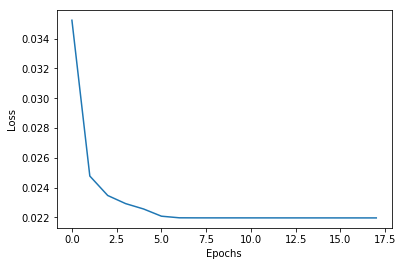

In [32]:
plt.plot(regr.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [103]:
# Prediction
Y_pred = regr.predict(X)

# Iterations

In [28]:
Y_pred = np.concatenate((Y, Y, Y), axis=1)

col = 0
for nodes in range(2, 4 + 1):  # 2..4 nodes
    regr = MLPRegressor(solver='adam',  # solver, alternative to 'sgd', lbfgs'
                        alpha=0,  # no L2 regularization
                        hidden_layer_sizes=nodes,  # nodes
                        activation='logistic',  # hidden layer activation function. Default 'relu'
                        max_iter=20,  # iterations
                        tol=0.0001,  # tolerance loss improvement
                        # n_iter_no_change = 5,  # epochs with less than tol loss improvement
                        verbose=True)  # tell me a story
    regr.out_activation_ = 'identity'  # output layer activation function. Default 'identity'
    
    regr.fit(X, Y)
    Y_pred[:, col*3:col*3+3] = regr.predict(X)
    col += 1

Iteration 1, loss = 0.15224445
Iteration 2, loss = 0.15043298
Iteration 3, loss = 0.15032710
Iteration 4, loss = 0.15029320
Iteration 5, loss = 0.15028009
Iteration 6, loss = 0.15027878
Iteration 7, loss = 0.15027892
Iteration 8, loss = 0.15027799
Iteration 9, loss = 0.15027890
Iteration 10, loss = 0.15027851
Iteration 11, loss = 0.15027866
Iteration 12, loss = 0.15027818
Iteration 13, loss = 0.15027857
Iteration 14, loss = 0.15027848
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.08214943
Iteration 2, loss = 0.06895502
Iteration 3, loss = 0.06881758
Iteration 4, loss = 0.06878116
Iteration 5, loss = 0.06876178
Iteration 6, loss = 0.06874719
Iteration 7, loss = 0.06873437
Iteration 8, loss = 0.06872437
Iteration 9, loss = 0.06871395
Iteration 10, loss = 0.06870426
Iteration 11, loss = 0.06869435
Iteration 12, loss = 0.06868474
Iteration 13, loss = 0.06867556
Iteration 14, loss = 0.06866688
Training loss did not improve mo

## 2 nodes

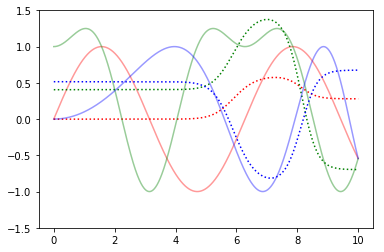

In [40]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,0], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,1], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,2], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 3 nodes

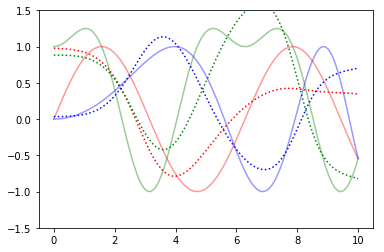

In [41]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,3], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,4], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,5], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 4 nodes

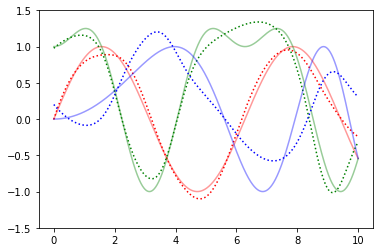

In [42]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,6], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,7], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,8], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

In [43]:
Y_pred = np.concatenate((Y, Y, Y), axis=1)

col = 0
for nodes in range(5, 7 + 1):  # 5..7 nodes
    regr = MLPRegressor(solver='adam',  # solver, alternative to 'sgd', lbfgs'
                        alpha=0,  # no L2 regularization
                        hidden_layer_sizes=nodes,  # nodes
                        activation='logistic',  # hidden layer activation function. Default 'relu'
                        max_iter=20,  # iterations
                        tol=0.0001,  # tolerance loss improvement
                        # n_iter_no_change = 5,  # epochs with less than tol loss improvement
                        verbose=True)  # tell me a story
    regr.out_activation_ = 'identity'  # output layer activation function. Default 'identity'
    
    regr.fit(X, Y)
    Y_pred[:, col*3:col*3+3] = regr.predict(X)
    col += 1

Iteration 1, loss = 0.01315522
Iteration 2, loss = 0.00603473
Iteration 3, loss = 0.00567549
Iteration 4, loss = 0.00555572
Iteration 5, loss = 0.00549836
Iteration 6, loss = 0.00545851
Iteration 7, loss = 0.00542265
Iteration 8, loss = 0.00526510
Iteration 9, loss = 0.00512062
Iteration 10, loss = 0.00507655
Iteration 11, loss = 0.00504458
Iteration 12, loss = 0.00501980
Iteration 13, loss = 0.00499865
Iteration 14, loss = 0.00497953
Iteration 15, loss = 0.00496175
Iteration 16, loss = 0.00494492
Iteration 17, loss = 0.00492913
Iteration 18, loss = 0.00491348
Iteration 19, loss = 0.00489894
Iteration 20, loss = 0.00488428
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.01122950
Iteration 2, loss = 0.00366118
Iteration 3, loss = 0.00219080
Iteration 4, loss = 0.00172602
Iteration 5, loss = 0.00154940
Iteration 6, loss = 0.00141713
Iteration 7, loss = 0.00131210
Iteration 8, loss = 0.00122056
Iteration 9, loss = 0.00112535


C:\Users\gluij\Anaconda3\envs\py36env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.00613094
Iteration 2, loss = 0.00006680
Iteration 3, loss = 0.00005687
Iteration 4, loss = 0.00005277
Iteration 5, loss = 0.00005049
Iteration 6, loss = 0.00004897
Iteration 7, loss = 0.00004788
Iteration 8, loss = 0.00004698
Iteration 9, loss = 0.00004621
Iteration 10, loss = 0.00004553
Iteration 11, loss = 0.00004494
Iteration 12, loss = 0.00004436
Iteration 13, loss = 0.00004383
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


## 5 nodes

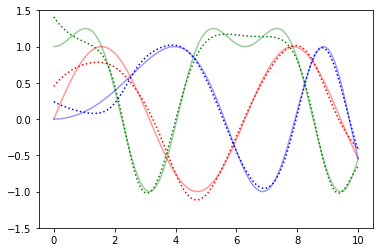

In [44]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,0], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,1], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,2], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 6 nodes

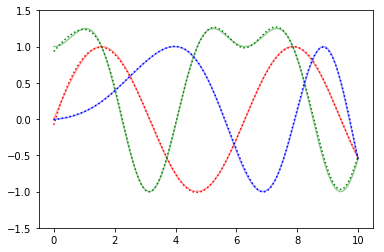

In [45]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,3], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,4], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,5], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 7 nodes

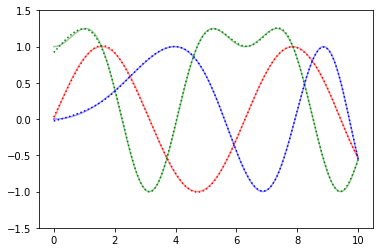

In [51]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,6], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,7], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,8], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

In [52]:
Y_pred = np.concatenate((Y, Y, Y), axis=1)

col = 0
for nodes in range(8, 10 + 1):  # 8..10 nodes
    regr = MLPRegressor(solver='adam',  # solver, alternative to 'sgd', lbfgs'
                        alpha=0,  # no L2 regularization
                        hidden_layer_sizes=nodes,  # nodes
                        activation='logistic',  # hidden layer activation function. Default 'relu'
                        max_iter=20,  # iterations
                        tol=0.0001,  # tolerance for early stopping
                        verbose=True)  # tell me a story
    regr.out_activation_ = 'identity'  # output layer activation function. Default 'identity'
    
    regr.fit(X, Y)
    Y_pred[:, col*3:col*3+3] = regr.predict(X)
    col += 1

Iteration 1, loss = 0.00520310
Iteration 2, loss = 0.00013964
Iteration 3, loss = 0.00011578
Iteration 4, loss = 0.00010179
Iteration 5, loss = 0.00009258
Iteration 6, loss = 0.00008600
Iteration 7, loss = 0.00007401
Iteration 8, loss = 0.00004370
Iteration 9, loss = 0.00003157
Iteration 10, loss = 0.00002612
Iteration 11, loss = 0.00002318
Iteration 12, loss = 0.00002133
Iteration 13, loss = 0.00001995
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.00526913
Iteration 2, loss = 0.00003594
Iteration 3, loss = 0.00003113
Iteration 4, loss = 0.00002815
Iteration 5, loss = 0.00002509
Iteration 6, loss = 0.00002029
Iteration 7, loss = 0.00001611
Iteration 8, loss = 0.00001384
Iteration 9, loss = 0.00001137
Iteration 10, loss = 0.00000772
Iteration 11, loss = 0.00000500
Iteration 12, loss = 0.00000403
Iteration 13, loss = 0.00000362
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

In [61]:
regr.coefs_[0].shape

(3, 10)

In [62]:
regr.coefs_

[array([[-0.89260463,  0.49723741,  0.55684868,  0.9073879 , -0.25223793,
         -0.17925846, -0.73782225,  0.05782421,  1.00428581, -2.38018   ],
        [ 0.6718891 ,  1.09762645,  0.36083226, -0.26549242, -0.79835539,
         -0.63215489,  0.69570912,  0.69477957, -0.13538935,  0.66476802],
        [-0.29708549, -0.75907292, -1.04838253,  0.08270239,  0.5513592 ,
          0.93508992, -0.97228357, -1.01251444,  0.7682076 ,  2.30925293]]),
 array([[-0.21991566, -1.72518122,  0.91771471],
        [ 0.80458567, -3.15374344,  4.92420552],
        [-0.66688924, -0.43598419, -6.08568936],
        [-5.39847125,  1.17943105,  1.78860835],
        [-2.04144197, -7.72721878,  0.45814003],
        [ 1.52919831,  3.24201284, -1.92885252],
        [ 0.54544351, -2.61968514, -0.55903878],
        [-1.41025283,  2.61433089,  2.47173347],
        [ 4.57838599,  1.2356529 , -0.21433148],
        [-1.04818512,  5.05511281,  0.21077437]])]

## 8 nodes

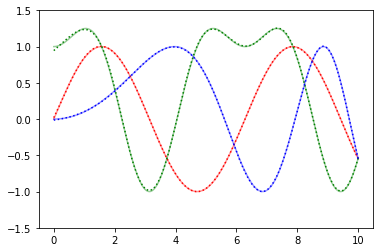

In [53]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,0], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,1], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,2], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 9 nodes

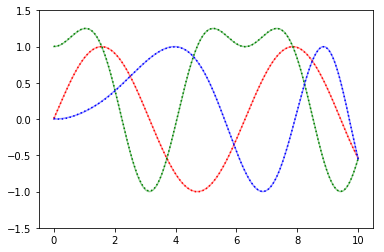

In [54]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,3], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,4], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,5], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()

## 10 nodes

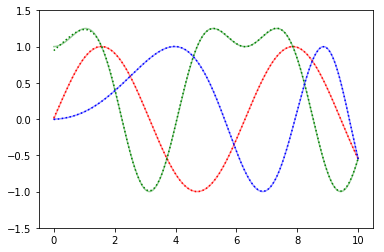

In [55]:
# Plot (arbitrarily) vs X[:,0]
plt.plot(X[:,0], Y[:,0], color='r', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,6], 'r', linestyle='dotted')

plt.plot(X[:,0], Y[:,1], color='g', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,7], 'g', linestyle='dotted')

plt.plot(X[:,0], Y[:,2], color='b', alpha=0.4)
plt.plot(X[:,0], Y_pred[:,8], 'b', linestyle='dotted')

plt.ylim((-1.5, 1.5))
plt.show()